# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [1]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

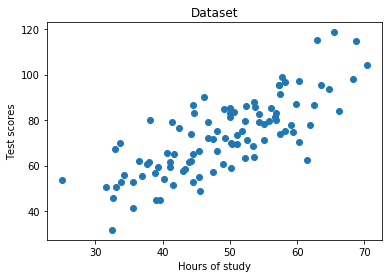

In [3]:
points = genfromtxt('data.csv', delimiter=',')
#print(points)
#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [4]:
#hyperparamters
learning_rate = 0.0001
initial_c = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [10]:
def compute_cost(c, m, points):
    total_cost = 0
    n = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + c)) ** 2
        
    #Return average of squared error
    return total_cost/n

#### Define Gradient Descent functions

In [11]:
def gradient_descent_runner(points, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
    cost_graph = []

    #For every iteration, optimize c, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(c, m, points))
        c, m = step_gradient(c, m, array(points), learning_rate)

    return [c, m, cost_graph]

def step_gradient(c_current, m_current, points, learning_rate):
    m_gradient = 0
    c_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + c_current))
        c_gradient += - (2/N) * (y - (m_current * x + c_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    c_updated = c_current - learning_rate * c_gradient

    #Return updated parameters
    return c_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters c and m

In [12]:
c, m, cost_graph = gradient_descent_runner(points, initial_c, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized c:', c)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(c, m, points))

Optimized c: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

In [11]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

In [12]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + c
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()